In [ ]:
Dominik Allen- 232487
ML Homework 3

Conceptual

1. Provide an explanation of the algorithm that is used to fit a regression tree.

Regression trees use a top down greedy approach called recursive binary splitting to partition data and build a tree structure to predict continuous (or classification in some cases) target values. The process of the algorithm is to recursively split the data based on a feature that leads to greatest possible reduction error (can be a metric such as MSE) and creates two new branches each leading to a child node. This process happens again at each node that is created and continues until all of the leaves are pure, or a stopping condition (such as predetermined maximum depth) is met. Once that condition is met or all the leaves are pure, a predictive value is given to each leaf. (Source- Lecture 5 slides)

2. Suppose that we use some learning method to make a prediction for the response Y for a particular value of the predictor X. Describe how we might estimate the standard deviation of our prediction.

You could use the bootstrap method to estimate this standard deviation. To do this we would make multiple bootstrap samples (eg 1000) and in each we would resample with replacement from the original data. Then, we would fit the model on each of these bootstrap samples and make predictions for the target value of X. Finally, we would then calculate the standard deviation based on the distribution of these predicted values. (Sources- Lecture 7 slides, lecture 7 bootstrap_linear_regression demo, and "Bootstrapping a Standard Deviation" from https://people.hsc.edu/faculty-staff/blins/classes/spring16/math222/examples/Risk/Risk.html)

3. Describe with your own words what do you understand by: prior distribution, likelihood function, posterior distribution, and posterior predictive distribution.

Prior distribution- my knowledge of something (X) happening before i have the chance to observe any data or experiments. (Where i think a ball will land based on knowing nothing about the location of it)
Likelihood function- equation or function that represents a likelikehood of something occuring based on its underlying distribution
Posterior distribution- my knowledge of the chances of something (X) occuring based on updating my belief (prior) after learning something about the chance of it based on something else (Y).
Posterior predictive distribution- my thought of exactly what will happen with new, unseen data points given my updated knowledge of the posterior distribution
(Source- lecture 8 pool table example)

4. In the context of hierarchical models, using your own words explain the following concepts in two or three sentences: complete pooling, no pooling, partial pooling (aka hierarchical modelling)

Complete pooling- A completely pooled model is a model that estimates the same parameters for all underlying groups. It ignores group structure in the data and treats them all as if they are from the same population ignoring that there could be differences between the groups. This approach works if there is actually one universal effect, but would be a problem if there were actually differences in the group. 

No pooling- In a no pooled model, its assumed that each of the groups are not related, so then each group gets its own separate model without borrowing any information from other groups. So each group gets its own different parameters unlike in a completely pooled model. . This can work if the data is actually between groups, but it wil be less accurate if there is a shared underlying effect.  

Partially pooled model- A partially pooled model is a good in between between the two models aboce. It can share information across groups while still allowing for group-specific effects. THe way it works is by  placing hyper-priors on the group-level parameters. The hyper-priors are typically placed on the mean and standard deviation of the group-level parameters. This works well because it allows for a more flexible model that can adapt to the data while still sharing information across groups. (Source- Lab 9 hierarchical modeling code)

Applied

In [203]:
import ISLP

In [204]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

5. Get familiar with the data by performing exploratory data analysis. Comment your plots and describe characteristics of the data.

In [205]:
# load the data
data = ISLP.load_data("OJ")

In [206]:
# head data to get column info
data.head()

Purchase  WeekofPurchase  StoreID  PriceCH  PriceMM  DiscCH  DiscMM  \
0       CH             237        1     1.75     1.99    0.00     0.0   
1       CH             239        1     1.75     1.99    0.00     0.3   
2       CH             245        1     1.86     2.09    0.17     0.0   
3       MM             227        1     1.69     1.69    0.00     0.0   
4       CH             228        7     1.69     1.69    0.00     0.0   

   SpecialCH  SpecialMM   LoyalCH  SalePriceMM  SalePriceCH  PriceDiff Store7  \
0          0          0  0.500000         1.99         1.75       0.24     No   
1          0          1  0.600000         1.69         1.75      -0.06     No   
2          0          0  0.680000         2.09         1.69       0.40     No   
3          0          0  0.400000         1.69         1.69       0.00     No   
4          0          0  0.956535         1.69         1.69       0.00    Yes   

   PctDiscMM  PctDiscCH  ListPriceDiff  STORE  
0   0.000000   0.000000           0.24      1  
1   0.150754   0.000000           0.24      1  
2   0.000000   0.091398           0.23      1  
3   0.000000   0.000000           0.00      1  
4   0.000000   0.000000           0.00      0

In [207]:
#split into target and features
y_df = data['Purchase']
X_df = data.drop(columns=['Purchase'])

In [208]:
#see how many unique values are in the target variable. Here we see that there are only two values, so 2 types of juices
print(y_df.nunique())

2


In [209]:
#get descriptive statistics for the data
data.describe()

WeekofPurchase      StoreID      PriceCH      PriceMM       DiscCH  \
count     1070.000000  1070.000000  1070.000000  1070.000000  1070.000000   
mean       254.381308     3.959813     1.867421     2.085411     0.051860   
std         15.558286     2.308984     0.101970     0.134386     0.117474   
min        227.000000     1.000000     1.690000     1.690000     0.000000   
25%        240.000000     2.000000     1.790000     1.990000     0.000000   
50%        257.000000     3.000000     1.860000     2.090000     0.000000   
75%        268.000000     7.000000     1.990000     2.180000     0.000000   
max        278.000000     7.000000     2.090000     2.290000     0.500000   

            DiscMM    SpecialCH    SpecialMM      LoyalCH  SalePriceMM  \
count  1070.000000  1070.000000  1070.000000  1070.000000  1070.000000   
mean      0.123364     0.147664     0.161682     0.565782     1.962047   
std       0.213834     0.354932     0.368331     0.307843     0.252697   
min       0.000000     0.000000     0.000000     0.000011     1.190000   
25%       0.000000     0.000000     0.000000     0.325257     1.690000   
50%       0.000000     0.000000     0.000000     0.600000     2.090000   
75%       0.230000     0.000000     0.000000     0.850873     2.130000   
max       0.800000     1.000000     1.000000     0.999947     2.290000   

       SalePriceCH    PriceDiff    PctDiscMM    PctDiscCH  ListPriceDiff  \
count  1070.000000  1070.000000  1070.000000  1070.000000    1070.000000   
mean      1.815561     0.146486     0.059298     0.027314       0.217991   
std       0.143384     0.271563     0.101760     0.062232       0.107535   
min       1.390000    -0.670000     0.000000     0.000000       0.000000   
25%       1.750000     0.000000     0.000000     0.000000       0.140000   
50%       1.860000     0.230000     0.000000     0.000000       0.240000   
75%       1.890000     0.320000     0.112676     0.000000       0.300000   
max       2.090000     0.640000     0.402010     0.252688       0.440000   

             STORE  
count  1070.000000  
mean      1.630841  
std       1.430387  
min       0.000000  
25%       0.000000  
50%       2.000000  
75%       3.000000  
max       4.000000

The table above shows us alot of descriptive information about the data. Here we see that there are a total of 1070 total observations broken down into 16 different features mainly including information about the store, normal price and sales price of the different juices, and information about discounts and specials of each. From this overview we can see that the range of the weeks of purchase are from lowest of week 227 to max of 278, meaning they were all sold between those weeks. There were only 7 stores that the data was taken from. The average price for Cirtrus hill OJ was $1.86 with the price ranging from $1.69 to $2.09 and the average price for minute maid OJ being $2.08 (much higher relatively) with the prices ranging fromalso 1.69 to $2.29. However we also see that the average sale price of minute maid is $1.96 and the average sale price of Citrus Hill was $1.81. It also appears that store 5 did not sell any of these OJs.


<Axes: >

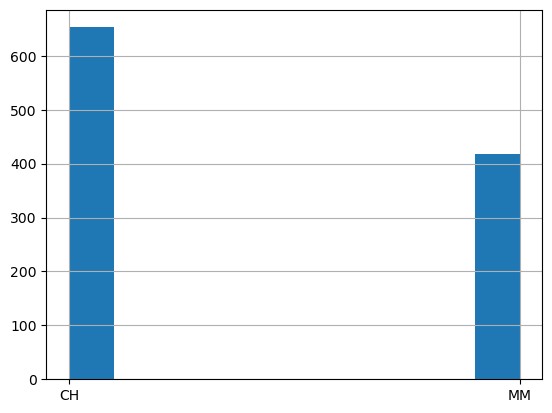

In [210]:
y_df.hist()

Plotted above is a simple histogram showing the overall purchase numbers of citrus hill vs minute maid juice, showing that citrus hill had over 200 more purchases than minute maid.

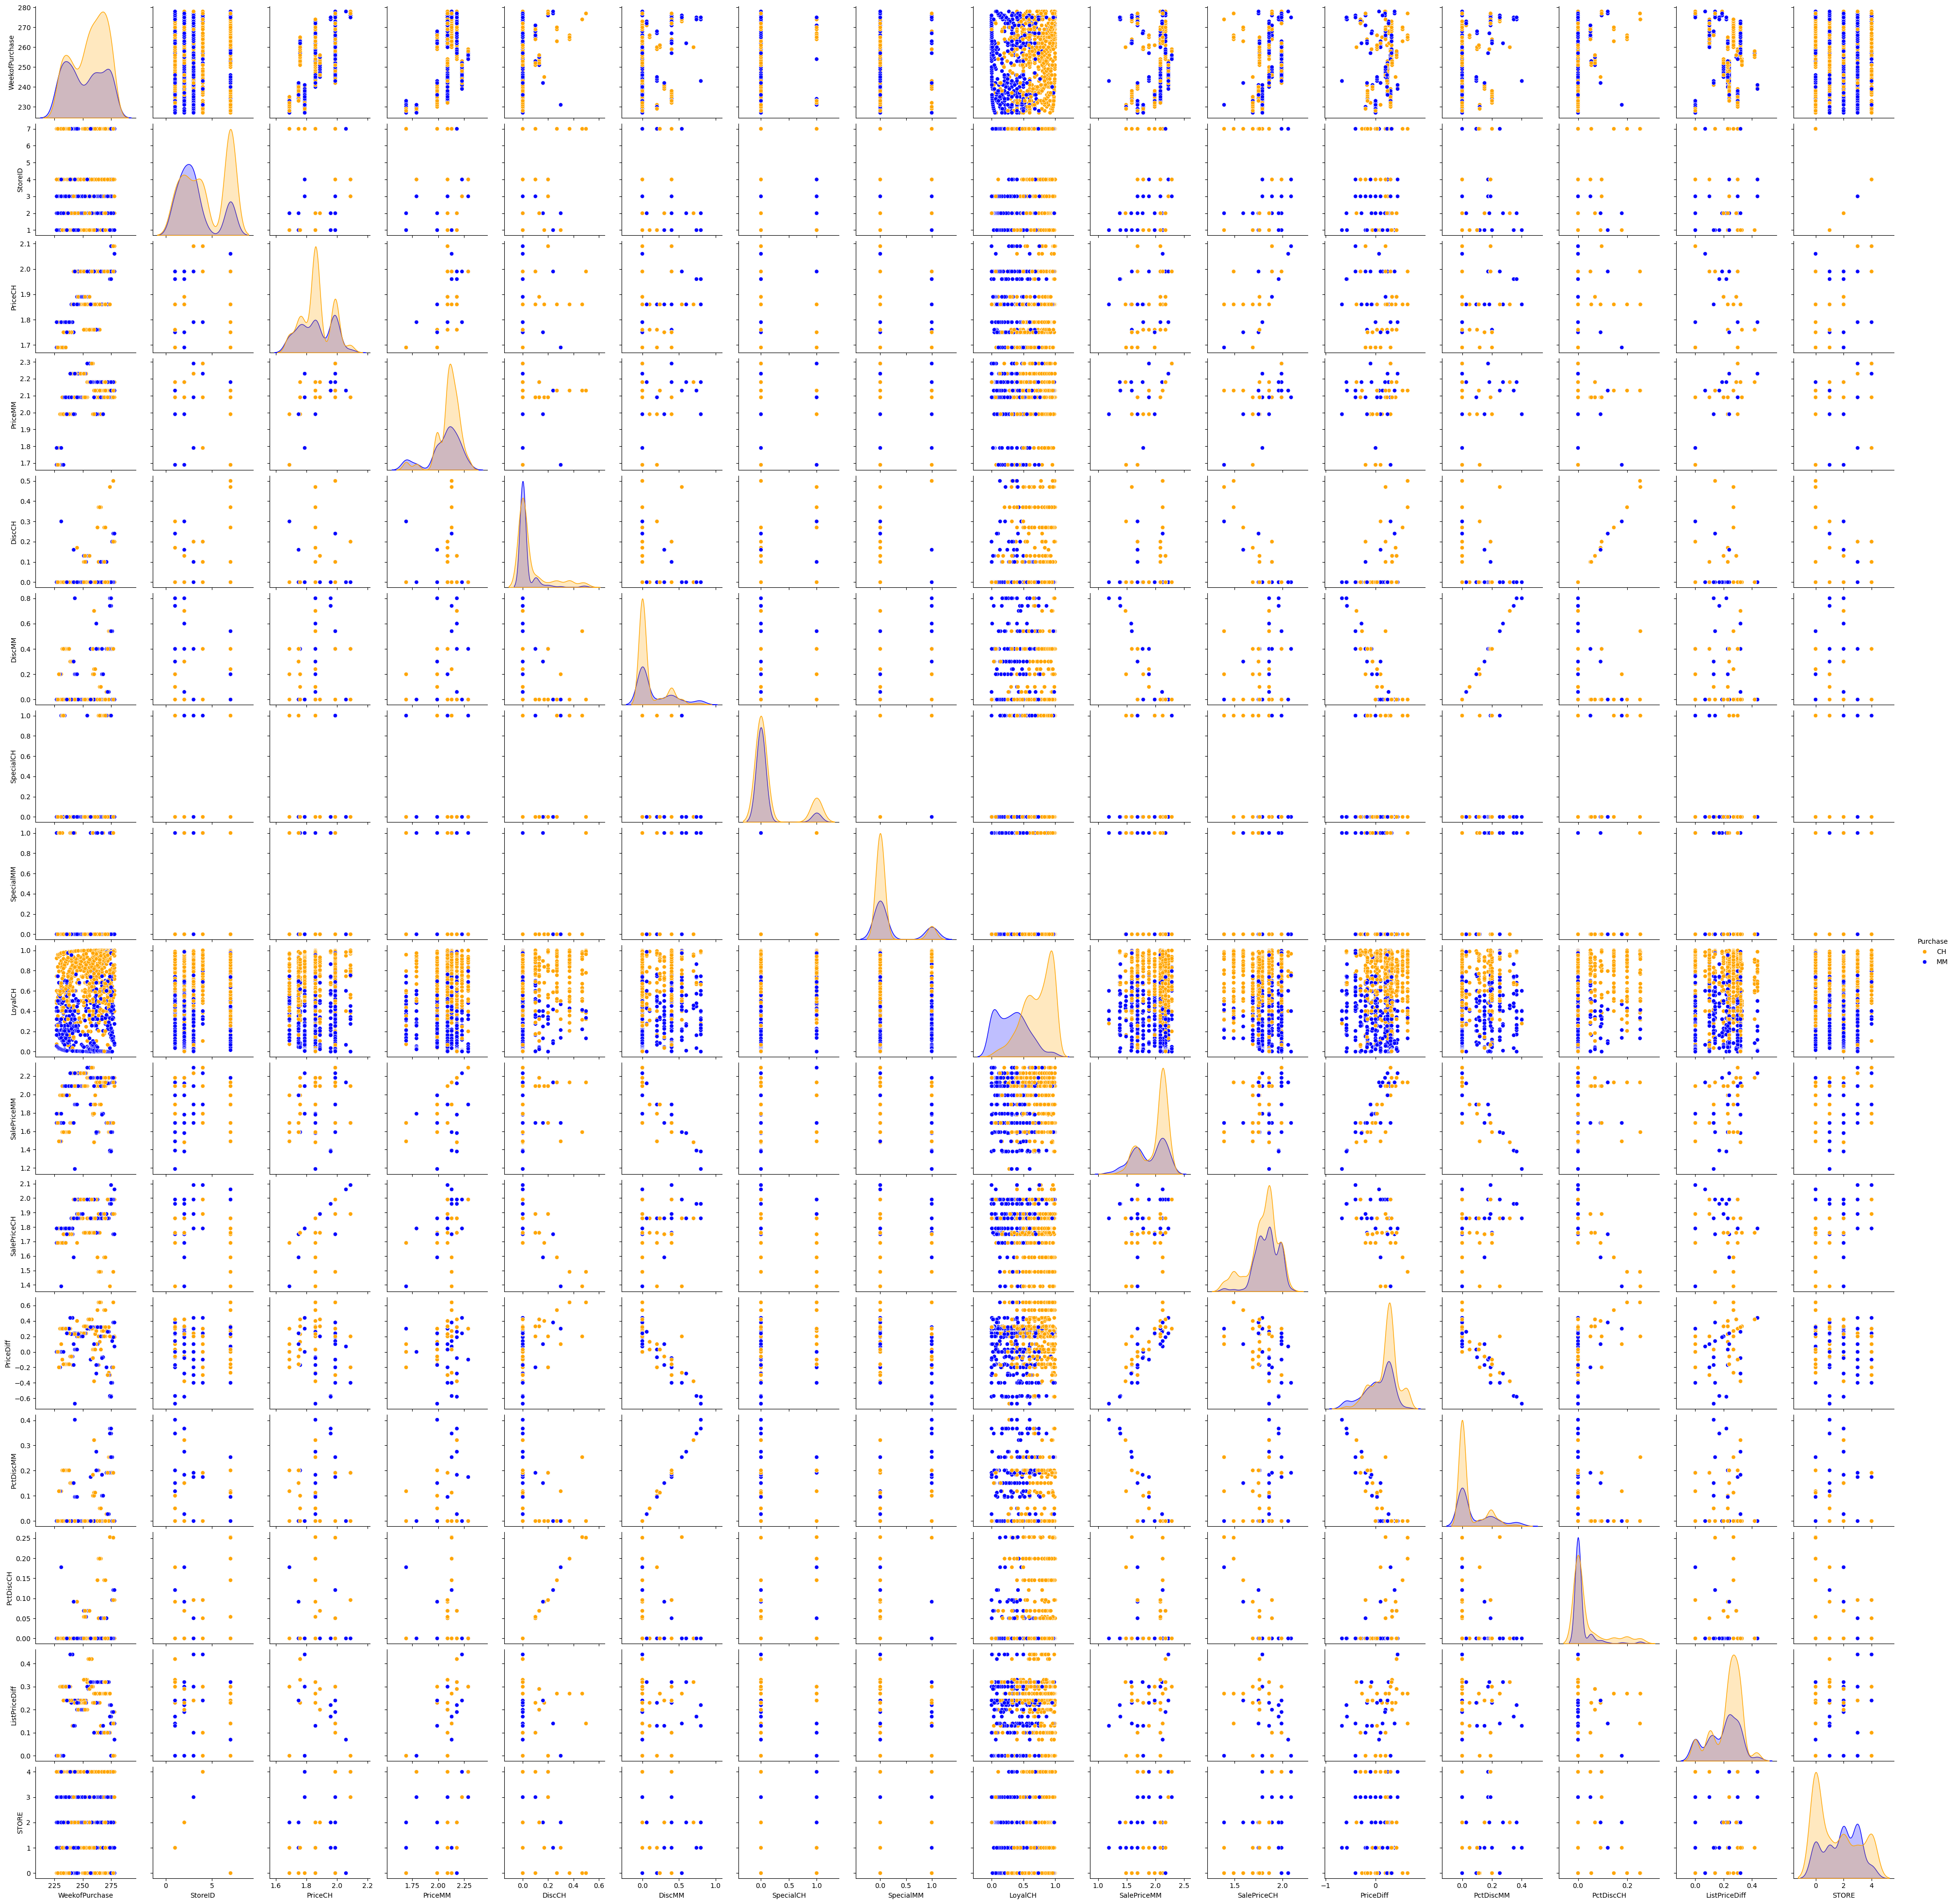

In [167]:
#Make a pairplot with target variable of CH being represented by orange and MM being represented by blue
sns.pairplot(data, hue='Purchase', palette={'MM': 'blue', 'CH': 'orange'})
plt.show()


From the above pairplot we can see from the density curves that both of the juice types follow generally the same pattern, but the loyal to CH variable is the only one with clearly differentiable curves that split the groups well. It also appears like citrus hill seems to sell in the higher weeks (over 250). Additionally, the variables Percent discount CH, specialCH, and discountCH have tight peaks showing that they dont vary too much and have few outliers. 

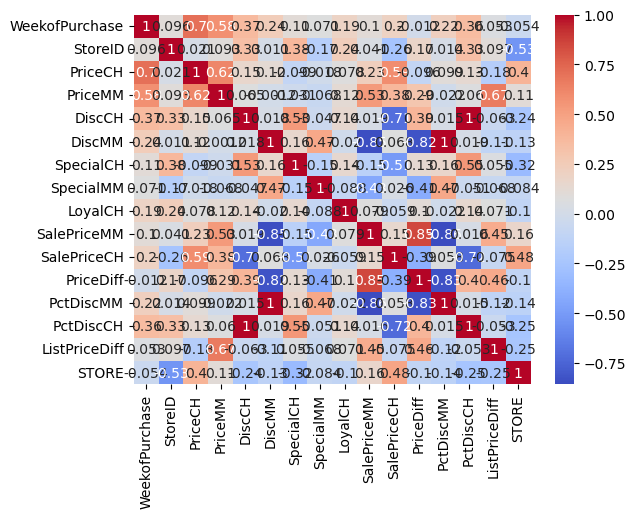

In [168]:
# make correlation matrix with numeric variables
corr = data.drop(columns=['Store7', 'Purchase']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()       

Above I have created a correlation plot to show the overall correlations between each of the variables. While there are strong correlations between the obvious variables that are tied together (for example a strong correlation between discount of minute maid and price difference) there is not one that stands out or is much different than would be initially assumed.

6. Split the data using 80% of the observations for training, and the remaining data for testing. You may want to preprocess the data to encode categorical variables into one-hot encoding (e.g StoreID). Are there redundant variables? How do you treat those?

In [211]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree

# 1. Split the data
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=42)

categorical_features = ['WeekofPurchase', 'StoreID','SpecialCH', 'SpecialMM', 'Store7', 'STORE']
numerical_features = ['PriceCH', 'PriceMM', 'DiscCH', 'DiscMM', 'LoyalCH', 'SalePriceCH', 'SalePriceMM', 'PriceDiff', 
                      'PctDiscMM', 'PctDiscCH', 'ListPriceDiff']

# Preprocessors for numerical and categorical data
preprocessor = ColumnTransformer([
    ('cat', OneHotEncoder(handle_unknown='ignore', drop='first', sparse_output=False), categorical_features),
    ('num', StandardScaler(), numerical_features)
])

#Use the preprocessor to transform the data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)



In this question, I get redundant variables after doing the onehot encoding on the category variables such as StoreID and Store because they create a binary array of 0s and 1s. To combat this, I included the drop=first into the onehot encoding argument in order to drop the first category from each feature and remove its redundancy. (Source- lab 5 code)

7. Fit a Decision tree model to the training data with maximum depth of 5, with Purchase as the response and the other variables as predictors. What are the accuracy rates for train and test? Show the confusion matrix for train and test data. (hint recall usage of sklearn DecisionTreeClassifier from lab 5)

In [212]:
#make decision tree
dt = DecisionTreeClassifier(max_depth = 5,random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

#find accuracy rates for training and testing data
train_accuracy = accuracy_score(y_train, dt.predict(X_train))
test_accuracy = accuracy_score(y_test, dt_pred)
print(f"Training Accuracy: {train_accuracy}")   
print(f"Testing Accuracy: {test_accuracy}")    

#show the confusion matrix for training and testing data
cm_train = confusion_matrix(y_train, dt.predict(X_train))
cm_test = confusion_matrix(y_test, dt_pred)
print("Confusion Matrix for Training Data:")
print(cm_train)
print("Confusion Matrix for Testing Data:")
print(cm_test)


Training Accuracy: 0.8726635514018691
Testing Accuracy: 0.7757009345794392
Confusion Matrix for Training Data:
[[452  71]
 [ 38 295]]
Confusion Matrix for Testing Data:
[[102  28]
 [ 20  64]]


My interpretation of these results is that the decision tree model performs alot better on the training data (87.27%) than on the testing data (77.57%) which could possibly be from overfitting to the training data and not generalizing well. The confusion matrix for the testing data tells us that the number of false positives (incorrectly predicting a positive outcome) is 28 and false negatives (incorrectly predicting a negative outcome) is 20 which shows some misclassifications. The 64 true positives and 102 true negatives show us the model is still identifying most of the correct outcomes, but could still be alot better. (Source- Understanding the Confusion matrix in Machine Learning: https://www.geeksforgeeks.org/confusion-matrix-machine-learning/ and lab 5 slides)

8. Create a plot of the tree, and interpret the figure. How many terminal nodes does the tree have?

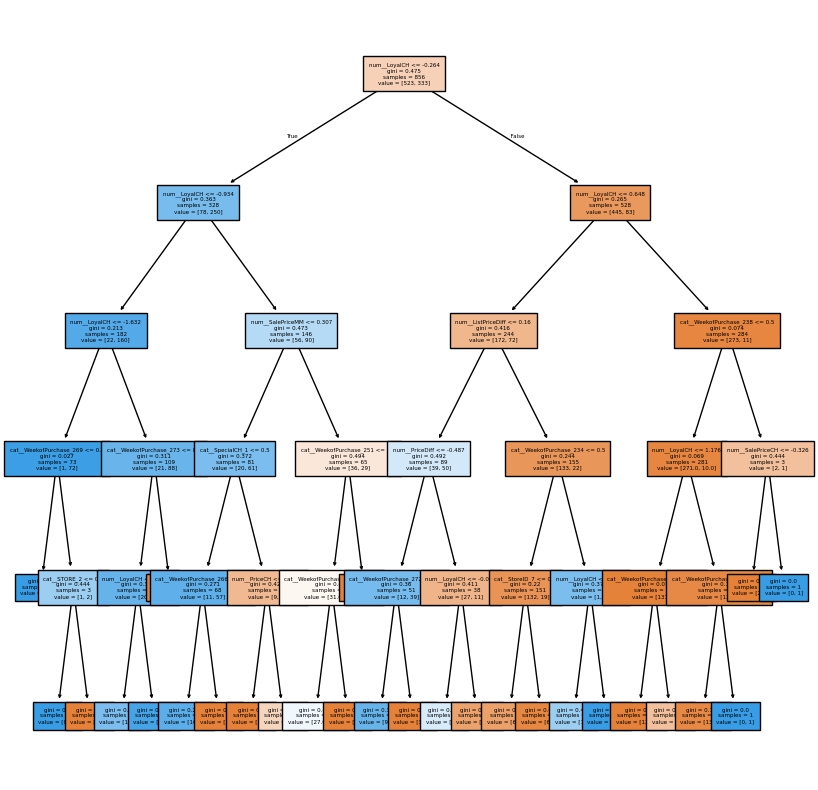

In [193]:
#Display the decision tree
plt.figure(figsize=(10,10))
plot_tree(dt, feature_names = preprocessor.get_feature_names_out(), filled=True, fontsize=4)
plt.show()

This decision tree has 22 terminal nodes after going down to a depth of 5 branches. An interpretation of this decision tree is that the most important feature (the one that reduces error the most) is the loyal citrus hill customer index, followed by sales price of minute maid, and then list price difference. After that it seems that many of the features have different amounts of predictive power throughout the splits.

9. Use cross-validation on the training set in order to determine the optimal tree depth. Produce a plot with tree size on the x-axis and cross-validated classification accuracy on the y-axis. Which tree size corresponds to the highest cross-validated accuracy? (hint recall sklearn.model selection.cross val score from lab 5)

In [213]:
dt_cv_scores = cross_val_score(dt, X_train, y_train, cv=4)
print("Mean 4-Fold CV Score: ", np.mean(dt_cv_scores))

print("Decision Tree Classifier")
print("Accuracy: ", accuracy_score(y_test, dt_pred))

Mean 4-Fold CV Score:  0.7990654205607477
Decision Tree Classifier
Accuracy:  0.7757009345794392


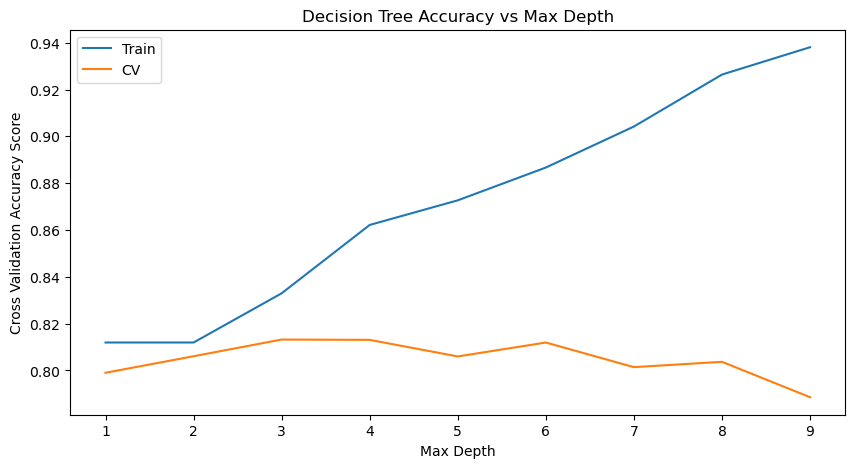

In [214]:
depths = np.arange(1, 10)
dt_train_scores = []
dt_cv_scores = []

for depth in depths:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_train, y_train)
    dt_train_pred = dt.predict(X_train)
    dt_train_scores.append(accuracy_score(y_train, dt_train_pred))
    dt_cv_scores.append(np.mean(cross_val_score(dt, X_train, y_train, cv=10)))
    
plt.figure(figsize=(10,5))
plt.plot(depths, dt_train_scores, label='Train')
plt.plot(depths, dt_cv_scores, label='CV')
plt.xlabel('Max Depth')
plt.ylabel('Cross Validation Accuracy Score')
plt.title('Decision Tree Accuracy vs Max Depth')
plt.legend()

From the plot above, it seems that the tree size or depth that corresponds to the highest cross-validated accuracy score is around between 3 and 4 max depth levels, and deeper starts getting into overfitting on the training set.

10. Plot the feature importance for the model with highest cross-validated accuracy.

In [215]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from xgboost import XGBClassifier, XGBRegressor
from sklearn.model_selection import GridSearchCV

Fitting 4 folds for each of 144 candidates, totalling 576 fits


/Users/dmnkallen/miniconda3/envs/ml2025/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:37:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/dmnkallen/miniconda3/envs/ml2025/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:37:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/dmnkallen/miniconda3/envs/ml2025/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:37:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/dmnkallen/miniconda3/envs/ml2025/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [15:37:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_e

Best parameters: {'colsample_bytree': 0.75, 'learning_rate': 0.01, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 150, 'subsample': 0.75}
Best cross-val accuracy: 0.8317757009345794


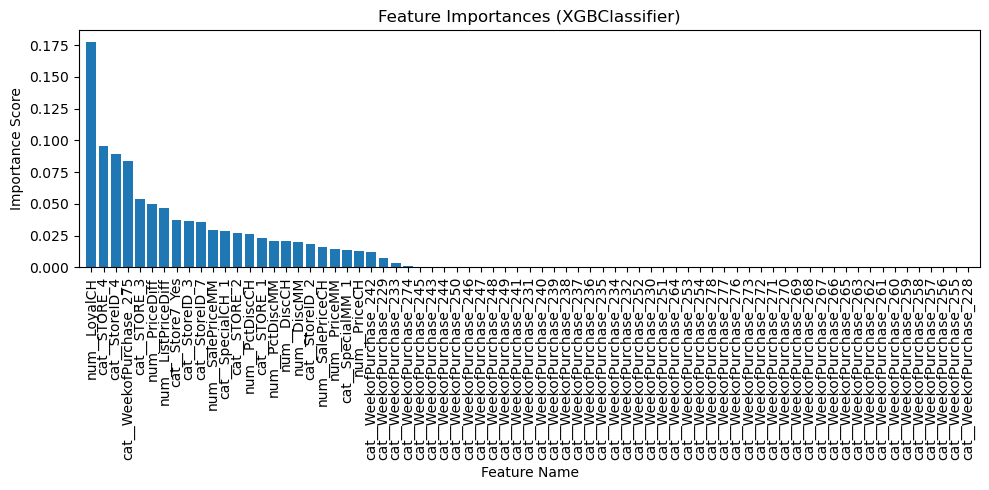

In [216]:
# Map y variables to 0 and 1 
y_train = y_train.map({'CH': 0, 'MM': 1})
y_test  = y_test. map({'CH': 0, 'MM': 1})

# Define the parameter grid 
param_grid = {
    'max_depth': [5, 7],
    'min_child_weight': [1, 2, 3],
    'learning_rate': [0.01, 0.05],
    'n_estimators': [50, 100, 150],
    'subsample': [0.75, 0.9],
    'colsample_bytree': [0.75, 0.9]
}

# Instantiate the classifier
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Set up GridSearchCV to fit and find the best features to maximize accuracy
grid_search = GridSearchCV(
    estimator=xgb_clf,
    param_grid=param_grid,
    scoring='accuracy',
    cv=4,
    verbose=1,
    n_jobs=-1
)

# Fit on the training data 
grid_search.fit(X_train, y_train)

# Get the best estimator and its cross val accuracy
xgb_optimized = grid_search.best_estimator_
print("Best parameters:", grid_search.best_params_)
print("Best cross-val accuracy:", grid_search.best_score_)

# Extract feature importances
importances   = xgb_optimized.feature_importances_
feature_names = preprocessor.get_feature_names_out()

# Sort for plotting
indices             = np.argsort(importances)[::-1]
sorted_importances  = importances[indices]
sorted_feature_names = feature_names[indices]

#Plot
plt.figure(figsize=(10, 5))
plt.title("Feature Importances (XGBClassifier)")
plt.bar(range(len(importances)), sorted_importances, align="center")
plt.xticks(range(len(importances)), sorted_feature_names, rotation=90, fontsize=10)
plt.xlim([-1, len(importances)])
plt.xlabel("Feature Name")
plt.ylabel("Importance Score")
plt.tight_layout()
plt.show()


In the above plot we can see all the feature importances for the best model. In the top four are cirtus hill loyalty, store number 4, the 275th week of purchase, and store number 4. At the end we can see all the lesser important features which include the other weeks of purchase broken into categorical form.

11. The feature LoyalCH (an index for customer brand loyalty for Citrus Hill) seems to be an important predictor for the brand choice. Explore the correlation between LoyalCH and Purchase. For example, you can show the distribution of LoyalCH for each category using sns.histplot.

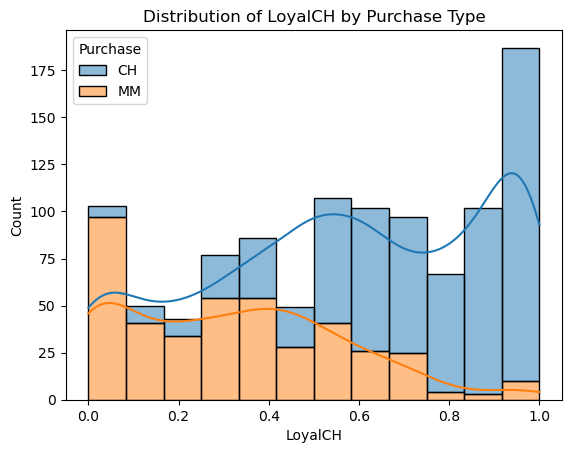

In [217]:
#Plot correlation between loyalty to CH and purchase
sns.histplot(data=data, x='LoyalCH', hue='Purchase', multiple='stack', kde=True)
plt.title('Distribution of LoyalCH by Purchase Type')
plt.xlabel('LoyalCH')
plt.ylabel('Count')
plt.show()

Interpretation of the plot above is that at the higher the citrus hill loyalty index, the more that people will choose citrus hill as opposed to minute maid OJ. From the above plot we can see that at below .4 index loyalty to citrus hill, the majority of customers actually bought minute maid juice, however when the majority of customers were in the CH loyalty (over .5 index) they majority preferred to purchase citrus hill juice. This is also seen on a gradient scale. 

12. 
i. Train a logistic regression model for Purchase using two predictors: LoyalCH
and PriceDiff. Interpret the parameters. Do you expect a positive or negative value for
the coefficient for LoyalCH? how about PriceDiff?

In [294]:
from ISLP import load_data
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Load data
data = load_data("OJ")

# Define features and target
X = data[['LoyalCH', 'PriceDiff']]
y = (data['Purchase'] == 'MM').astype(int)  # Convert to binary: CH = 0, MM = 1

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features (optional, but improves interpretation and training)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train logistic regression
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print model coefficients
print("Intercept:", model.intercept_[0])
print("Coefficients:", model.coef_[0])

# Map back to feature names for interpretation
features = ['LoyalCH', 'PriceDiff']
for feature, coef in zip(features, model.coef_[0]):
    print(f"{feature}: {coef:.4f}")


Accuracy: 0.8317757009345794
Intercept: -0.8009552211216536
Coefficients: [-1.95517571 -0.74835137]
LoyalCH: -1.9552
PriceDiff: -0.7484


I would expect negative coefficients for both LoyalCH and Price difference. The first because with MM being coded to 1 and CH converted to 0, I would expect there to be a negative relationship between being loyal to citrus hill and purchasing minute maid, or in other words, loyalCH is a very strong predictor, so if someone is more loyal to CH, they are much less likely to purchase MM. Additionally for pricediff, it is also an important feature, so the bigger the price difference (where MM is usually more expensive than CH), the less likely a customer is to buy MM. If these were coded the opposite way (OJ being 1 and MM being 0, i would expect the opposite, or a positive coefficient).

12ii. Use bootstrap to estimate uncertainty in the model parameters. Plot a his-
togram with the bootstrap samples (recall lab 7)

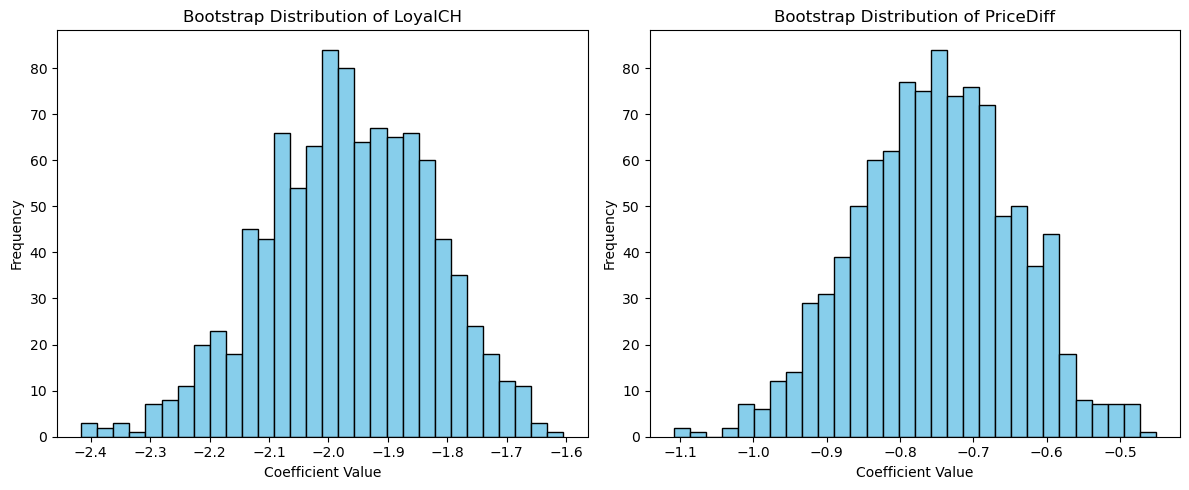

95% Confidence Intervals:
LoyalCH: [-2.2495, -1.7113]
PriceDiff: [-0.9622, -0.5505]


In [296]:
#new
import numpy as np
import matplotlib.pyplot as plt

# Number of bootstrap iterations
n_bootstraps = 1000
coefs = np.zeros((n_bootstraps, 2))  # Store coefficients for LoyalCH and PriceDiff

for i in range(n_bootstraps):
    # Resample the training data with replacement
    bootstrap_indices = np.random.choice(range(len(X_train)), size=len(X_train), replace=True)
    X_boot = X_train.iloc[bootstrap_indices]
    y_boot = y_train.iloc[bootstrap_indices]

    # Standardize
    X_boot_scaled = scaler.fit_transform(X_boot)

    # Fit model
    model = LogisticRegression()
    model.fit(X_boot_scaled, y_boot)

    # Store coefficients
    coefs[i] = model.coef_[0]

# Plot histograms
feature_names = ['LoyalCH', 'PriceDiff']
plt.figure(figsize=(12, 5))
for i in range(2):
    plt.subplot(1, 2, i + 1)
    plt.hist(coefs[:, i], bins=30, color='skyblue', edgecolor='k')
    plt.title(f'Bootstrap Distribution of {feature_names[i]}')
    plt.xlabel('Coefficient Value')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()
# Calculate 95% confidence intervals
ci_lower = np.percentile(coefs, 2.5, axis=0)
ci_upper = np.percentile(coefs, 97.5, axis=0)
print("95% Confidence Intervals:")
for feature, lower, upper in zip(feature_names, ci_lower, ci_upper):
    print(f"{feature}: [{lower:.4f}, {upper:.4f}]") 


These bootstrap histograms show us the distribution of coefficient estimates when runnning 10000 bootstrap samples. We can see they are normally distributed and around the same means as was predicted in part 1 (-1.95517571 and -0.74835137). Additionally, I have provided the 95% confidence intervals which also helps to estimate the uncertainty around these estimates. (Source- Used chatGPT along with lab 7 to help fix errors with my looping of the bootstrap estimates)

13i. Sample from the posterior distribution for the model parameters.

In [ ]:
#Model from homework page
import pymc as pm

def sigmoid(x):
    return 1 / (1 + np.exp(-x)) 
y=(data.Purchase == "MM").astype("int") 
logistic_model = pm.Model()

with logistic_model:
    # Define Priors
    b0 = pm.Normal("intercept", mu=0, sigma=10) 
    b1 = pm.Normal("LoyalCH", mu=0, sigma=10) 
    b2 = pm.Normal("PriceDiff", mu=0, sigma=10)
    mu = b0 + b1 * data.LoyalCH.values + b2 * data.PriceDiff.values

    # Define Likelihood
    likelihood = pm.Bernoulli("y", p=sigmoid(mu), observed=y)

    trace = pm.sample(2000, tune=1000, return_inferencedata=True, random_seed=42)



Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [intercept, LoyalCH, PriceDiff]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 8 seconds.


In [ ]:
#Updated/rewritten bayesian model to use training data, standardized the features and Wrapped everything inside with pm.Model():
import pymc as pm
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import arviz as az

# Prepare the data
X = data[['LoyalCH', 'PriceDiff']]
y = (data['Purchase'] == 'MM').astype(int)

# Split into train/test (same as bootstrap setup)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize predictors using the same scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Convert to NumPy arrays
X1 = X_train_scaled[:, 0]  # LoyalCH
X2 = X_train_scaled[:, 1]  # PriceDiff
y_train_array = y_train.values

# Bayesian logistic regression
with pm.Model() as logistic_model:
    # Priors for intercept and coefficients
    b0 = pm.Normal("intercept", mu=0, sigma=10)
    b1 = pm.Normal("LoyalCH", mu=0, sigma=10)
    b2 = pm.Normal("PriceDiff", mu=0, sigma=10)

    # Linear predictor and sigmoid link
    mu = b0 + b1 * X1 + b2 * X2
    p = pm.Deterministic("p", pm.math.sigmoid(mu))

    # Likelihood
    y_obs = pm.Bernoulli("y_obs", p=p, observed=y_train_array)

    # Sample from the posterior
    trace = pm.sample(2000, tune=1000, return_inferencedata=True, random_seed=42)
import arviz as az

summary = az.summary(trace, var_names=["intercept", "LoyalCH", "PriceDiff"])
print(summary)


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [intercept, LoyalCH, PriceDiff]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 6 seconds.


            mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  \
intercept -0.817  0.105  -1.025   -0.628      0.001    0.001    8450.0   
LoyalCH   -2.007  0.133  -2.267   -1.762      0.001    0.001    8445.0   
PriceDiff -0.768  0.105  -0.965   -0.576      0.001    0.001    8263.0   

           ess_tail  r_hat  
intercept    6550.0    1.0  
LoyalCH      5950.0    1.0  
PriceDiff    6292.0    1.0  


array([<Axes: title={'center': 'intercept'}>,
       <Axes: title={'center': 'LoyalCH'}>,
       <Axes: title={'center': 'PriceDiff'}>], dtype=object)

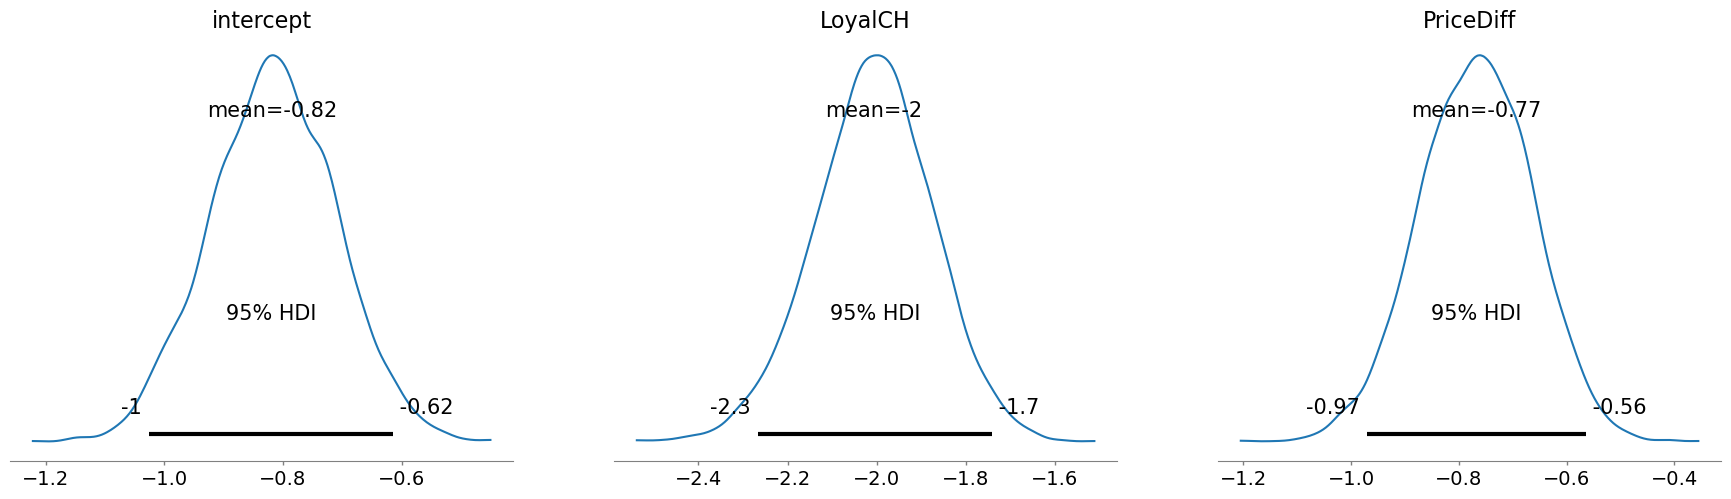

In [312]:
# Plot the marginal posterior distributions
az.plot_posterior(trace, var_names=["intercept", "LoyalCH", "PriceDiff"], hdi_prob=0.95)


array([[<Axes: title={'center': 'intercept'}>,
        <Axes: title={'center': 'intercept'}>],
       [<Axes: title={'center': 'LoyalCH'}>,
        <Axes: title={'center': 'LoyalCH'}>],
       [<Axes: title={'center': 'PriceDiff'}>,
        <Axes: title={'center': 'PriceDiff'}>]], dtype=object)

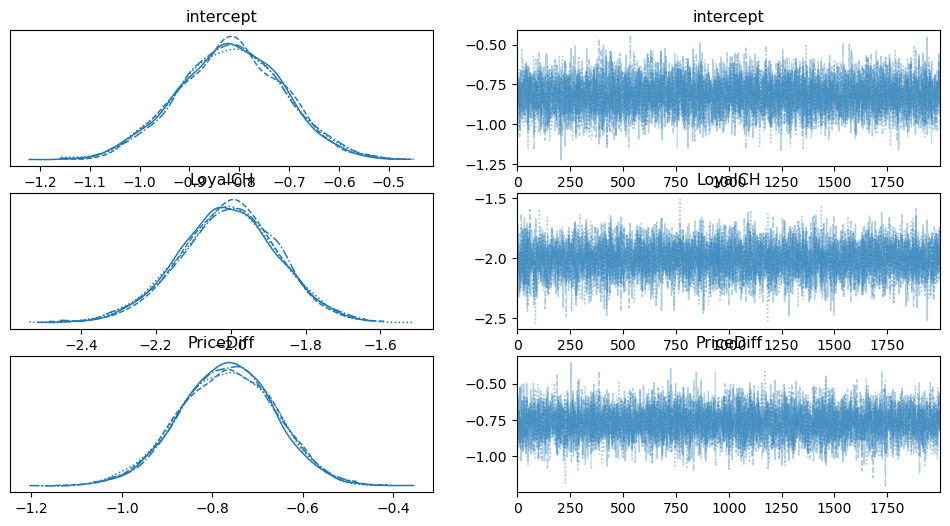

In [313]:
# Plot trace (sampling chains + distributions)
az.plot_trace(trace, var_names=["intercept", "LoyalCH", "PriceDiff"])


Pictured above is both the trace plots and distributions for each of the parameters. Each plot shows a normal distribution for each of the parameters. (Source- Lab 7 and used chatGPT to troubleshoot the updated bayesian model to include standardization of features and wrapping of model.)

13ii. Compare your results from the bayesian posterior distributions and the bootstrap distribution. Are the distributions similar?

In [314]:
#new
# Extract posterior samples into a NumPy array
posterior_samples = trace.posterior.stack(sample=("chain", "draw"))
b_coefs = np.vstack([
    posterior_samples["LoyalCH"].values,
    posterior_samples["PriceDiff"].values
]).T


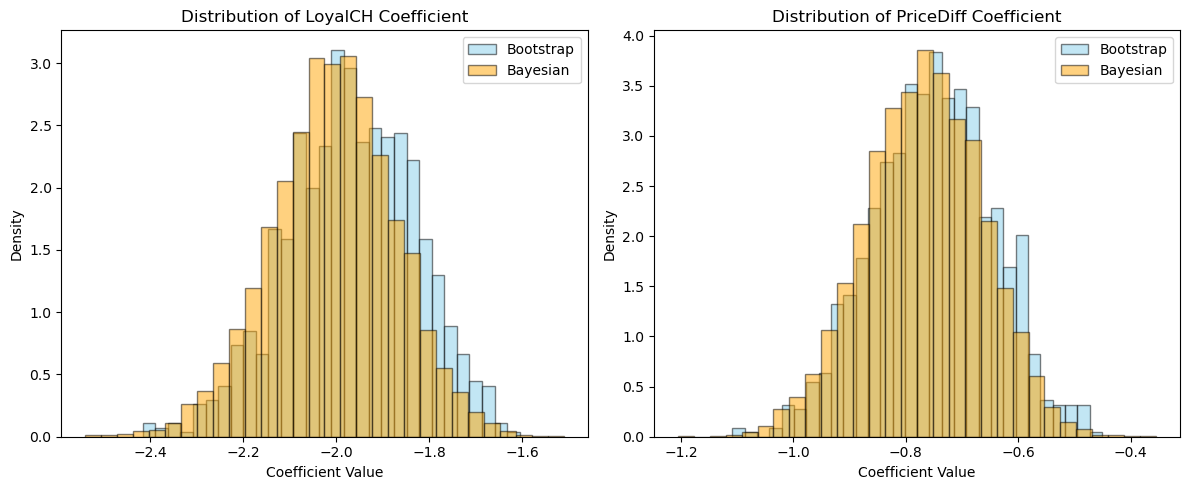

In [315]:
import matplotlib.pyplot as plt

features = ["LoyalCH", "PriceDiff"]
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

for i in range(2):
    # Bootstrap histogram
    axes[i].hist(coefs[:, i], bins=30, alpha=0.5, label="Bootstrap", color='skyblue', edgecolor='k', density=True)
    # Bayesian posterior histogram
    axes[i].hist(b_coefs[:, i], bins=30, alpha=0.5, label="Bayesian", color='orange', edgecolor='k', density=True)
    
    axes[i].set_title(f"Distribution of {features[i]} Coefficient")
    axes[i].set_xlabel("Coefficient Value")
    axes[i].set_ylabel("Density")
    axes[i].legend()

plt.tight_layout()
plt.show()


In [316]:
import pandas as pd

summary = pd.DataFrame({
    "Bootstrap Mean": coefs.mean(axis=0),
    "Bayesian Mean": b_coefs.mean(axis=0),
    "Bootstrap Std": coefs.std(axis=0),
    "Bayesian Std": b_coefs.std(axis=0)
}, index=features)

print(summary)


           Bootstrap Mean  Bayesian Mean  Bootstrap Std  Bayesian Std
LoyalCH         -1.967814      -2.006667       0.138924      0.133100
PriceDiff       -0.751143      -0.768094       0.107631      0.104801


The bayesian posterior and bootstrap distributions are generally similar, but there are still some small differences. The bayesian means for both parameters are both slightly lower than the bootstrap means, and the standard deviations are also slightly higher in the bayesian model, which i believe is due to the bayesian being a more conservative estimate while taking into account the prior. Even though theyre slightly different, I think both methods provide comparable results and capture the underlying data patterns. 